In [1]:
from pyALT import *
import pyALT.io as io
from matplotlib import pyplot as plt
G = io.load('meso_cortex.pk')

In [2]:
L = ALT(G)
thresholds = {'VISp':4,'AUDp':1,'GU':2.5,'SSp-ul':2.5,'SSp-tr':2.5,
              'SSp-m':4,'SSp-bfd':4,'SSp-ll':1.5,'SSp-n':0.98,'MOB':0.46}
srcs = ['SSp-n','AUDp','VISp','GU','SSp-ul','SSp-tr','SSp-m','SSp-bfd','SSp-ll']
for src in srcs:
    L.add_source(src)
    L.set_theta(src,0.98)
L.run()
L.form_paths()
pc = L.path_centrality()
core = L.core()

In [3]:
src = 'VISp'
ws = [G[n1][n2]['weight'] for n1,n2 in G.edges()]
ls = [G[n1][n2]['distance'] for n1,n2 in G.edges()]
L(src).edges()
adws = [G[n1][n2]['weight'] for n1,n2 in L(src).edges()]
adls = [G[n1][n2]['distance'] for n1,n2 in L(src).edges()]

(0, 6)

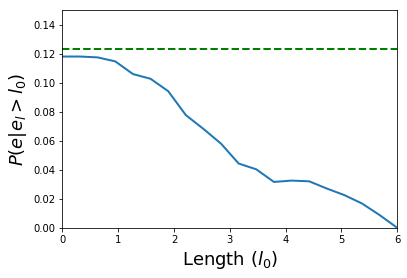

In [4]:
out = np.zeros(20)
for src in ['VISp','SSp-bfd','SSp-n','SSp-m','SSp-ul','SSp-ll','SSp-tr','AUDp','GU']:
    ws = [G[n1][n2]['weight'] for n1,n2 in G.edges()]
    ls = [G[n1][n2]['distance'] for n1,n2 in G.edges()]
    L(src).edges()
    adws = [G[n1][n2]['weight'] for n1,n2 in L(src).edges()]
    adls = [G[n1][n2]['distance'] for n1,n2 in L(src).edges()]
    x = np.linspace(0,6000,20)
    for i,w in enumerate(x):
        l1 = len(list(filter(lambda x:x>w,ls)))
        l2 = len(list(filter(lambda x:x>w,adls)))
        out[i] += l2/l1
pl.plot(x/1000,out/9,lw=2)
pl.axhline(len(adls)/len(ls),lw=2,ls='--',c='g')
pl.ylabel(r'$P(e|e_l>l_0)$',fontsize=18)
# pl.ylabel('Percent',fontsize=18)
pl.xlabel(r'Length $(l_0)$',fontsize=18)
pl.ylim([0,0.15])
pl.xlim([0,6])

(0, 10)

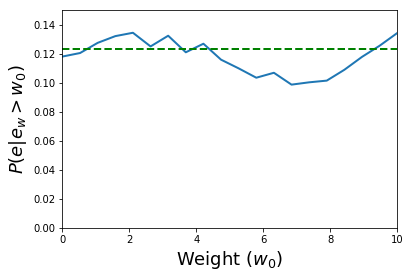

In [5]:
out = np.zeros(20)
for src in ['VISp','SSp-bfd','SSp-n','SSp-m','SSp-ul','SSp-ll','SSp-tr','AUDp','GU']:
    ws = [G[n1][n2]['weight'] for n1,n2 in G.edges()]
    ls = [G[n1][n2]['distance'] for n1,n2 in G.edges()]
    L(src).edges()
    adws = [G[n1][n2]['weight'] for n1,n2 in L(src).edges()]
    adls = [G[n1][n2]['distance'] for n1,n2 in L(src).edges()]
    x = np.linspace(0,10,20)
    for i,w in enumerate(x):
        l1 = len(list(filter(lambda x:x>w,ws)))
        l2 = len(list(filter(lambda x:x>w,adws)))
        try:
            out[i] += l2/l1
        except:
            pass
pl.plot(x,out/9,lw=2)
pl.axhline(len(adls)/len(ls),lw=2,ls='--',c='g')
pl.ylabel(r'$P(e|e_w>w_0)$',fontsize=18)
# pl.ylabel('Percent',fontsize=18)
pl.xlabel(r'Weight $(w_0)$',fontsize=18)
pl.ylim([0,0.15])
pl.xlim([0,10])

(0, 13.953488372093023)

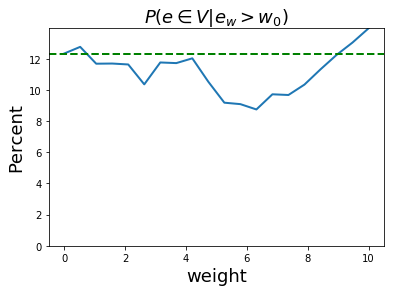

In [6]:
out = [0]*20
x = np.linspace(0,10,20)
for i,w in enumerate(x):
    l1 = len(list(filter(lambda x:x>w,ws)))
    l2 = len(list(filter(lambda x:x>w,adws)))
    out[i] = l2*100/l1
pl.plot(x,out,lw=2)
pl.axhline(len(adls)*100/len(ls),lw=2,ls='--',c='g')
pl.title(r'$P(e\in V|e_w>w_0)$',fontsize=18)
pl.ylabel('Percent',fontsize=18)
pl.xlabel('weight',fontsize=18)
pl.ylim([0,max(out)])

In [38]:

ed = np.zeros(10)
ed2 = np.zeros(10)
for src in ['VISp','SSp-bfd','SSp-n','SSp-m','SSp-ul','SSp-ll','SSp-tr','AUDp','GU']:
    L(src).edges()
    ls = []
    ws = []
    adws = [G[n1][n2]['weight'] for n1,n2 in L(src).edges()]
    adls = [G[n1][n2]['distance'] for n1,n2 in L(src).edges()]
    for n1,n2 in G.edges():
        try:
            L(src)[n1][n2]
        except KeyError:
            ws += [G[n1][n2]['weight']] 
            ls += [G[n1][n2]['distance']]
    q1,q2 = np.percentile(ls,[2,98])
    l1 = list(filter(lambda x:(x>q1 and x<q2),ls))
    l2 = list(filter(lambda x:(x>q1 and x<q2),adls))
    _ed,hi1 = np.histogram(l1,bins=10,density=True)
    _ed2,hi1 = np.histogram(l2,bins=10,density=True)
    ed += _ed
    ed2 += _ed2

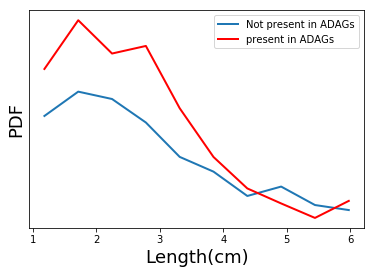

In [46]:

pl.plot(hi1[1:]/1000,ed,lw=2,label=r'Not present in ADAGs')
pl.plot(hi1[1:]/1000,ed2,'r',lw=2,label='present in ADAGs')
# pl.title('Edge length distribution',fontsize=18)
pl.ylabel('PDF',fontsize=18)
pl.xlabel('Length(cm)',fontsize=18)
pl.yticks([])
pl.legend()

In [19]:
ed

array([2895., 5299., 4518., 3299., 2757., 1773., 1447., 1128.,  765.,
        450.])

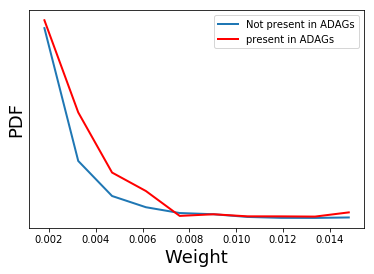

In [50]:
ed = np.zeros(10)
ed2 = np.zeros(10)
for src in ['VISp','SSp-bfd','SSp-n','SSp-m','SSp-ul','SSp-ll','SSp-tr','AUDp','GU']:
    L(src).edges()
    ls = []
    ws = []
    adws = [G[n1][n2]['weight'] for n1,n2 in L(src).edges()]
    adls = [G[n1][n2]['distance'] for n1,n2 in L(src).edges()]
    for n1,n2 in G.edges():
        try:
            L(src)[n1][n2]
        except KeyError:
            ws += [G[n1][n2]['weight']] 
            ls += [G[n1][n2]['distance']]
    q1,q2 = np.percentile(ws,[2,98])
    l1 = list(filter(lambda x:(x>q1 and x<q2),ws))
    l2 = list(filter(lambda x:(x>q1 and x<q2),adws))
    _ed,hi1 = np.histogram(l1,bins=10,density=True)
    _ed2,hi1 = np.histogram(l2,bins=10,density=True)
    ed += _ed
    ed2 += _ed2
pl.plot(hi1[1:]/1000,ed,lw=2,label=r'Not present in ADAGs')
pl.plot(hi1[1:]/1000,ed2,'r',lw=2,label='present in ADAGs')
# pl.title('Edge length distribution',fontsize=18)
pl.ylabel('PDF',fontsize=18)
pl.xlabel('Weight',fontsize=18)
pl.yticks([])
pl.legend()

In [24]:
332/G.size()

0.538961038961039

In [26]:
L('VISp').size()

75

In [27]:
75/G.size()

0.12175324675324675